In [8]:
import numpy as np
import pocomc as pc
import os
from getdist import plots, MCSamples
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
#names = ["Bias parameter", "Growth rate"]
names = ["b", "f"]
labels = ["b", "f"]

ref_chain = np.load("../output/BOSS_DR12_NGC_z1/samples/n2048/cov_sample/cov_sample_2048_results_v1.npy", allow_pickle=True)
reference = MCSamples(samples=ref_chain[()]["samples"], labels=labels, names=names)

Removed no burn in


In [13]:
chain_names = [
    "Reference",
    "Sample",
    "Covariance linear shrinkage",
    "Covariance NERCOME",
    "Precision linear shrinkage",
]

filenames = [
    "cov_sample_21.npy",
    "cov_shrinkage_Sii_21.npy",
    "cov_NERCOME_21.NPY",
    "pre_shrinkage_diag_then_inv_21.npy",
]

datapath = "../output/BOSS_DR12_NGC_z1/samples/n21/"

chains = [reference]
for filename in filenames:
    samples_chain = np.load(os.path.join(datapath, filename), allow_pickle=True)[()]
    chain = MCSamples(samples=samples_chain.samples, labels=labels, names=names)
    chains.append(chain)

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


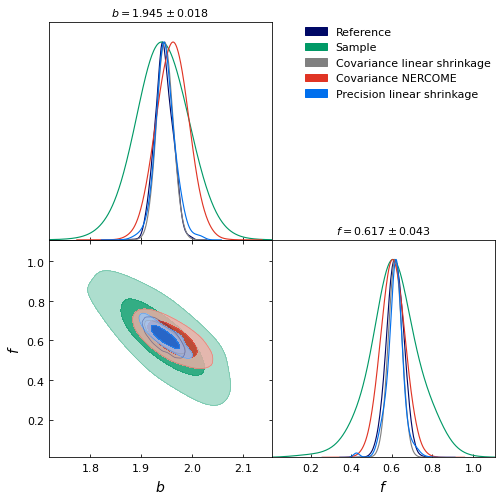

In [15]:
g = plots.getSubplotPlotter(subplot_size=4)
g.settings.figure_legend_frame = False
g.settings.legend_fontsize=11
g.triangle_plot(
    chains,
    filled=True,
    contour_args={'alpha':0.8}, title_limit=1,
    legend_labels=chain_names,
)

plt.savefig(f"../contour_plot.pdf", format="pdf", bbox_inches='tight', pad_inches = 0.1)